<a href="https://colab.research.google.com/github/Maureen36Mathenge/Core_IP_WEEK-2_EDA/blob/master/Moringa_Data_Science_Core_Week_2_Independent_Project_2019_Maureen_Mathenge_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
#upload the dataset
Finance = pd.read_csv("Financial Dataset.csv")

In [8]:
#view the first and last data
Finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [9]:
Finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [13]:
Finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [62]:
Finance.describe()

,year,household_size,Respondent_Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [96]:
Finance.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

Data **Cleaning**

Validity

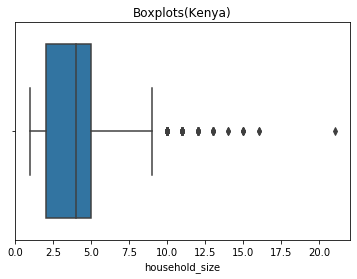

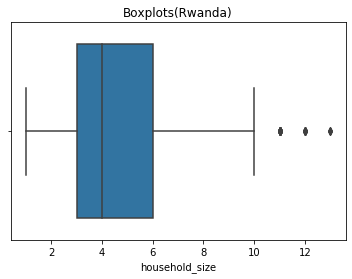

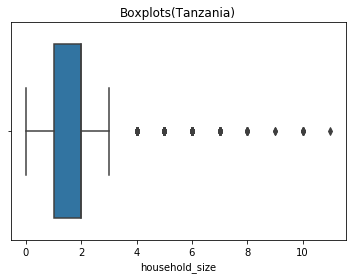

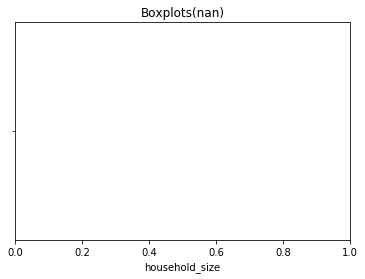

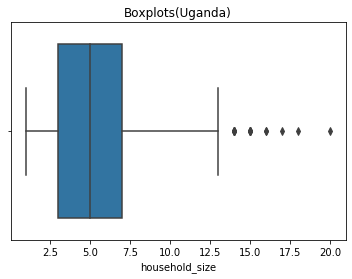

In [19]:
#Check for ouliers
for i in Finance.country.unique():
  plt.figure()
  sns.boxplot(x = Finance[Finance.country==i]['household_size'])
  plt.title(f"Boxplots({i})")
  plt.show()
  # We have outliers in our dataset
  # Some families are bigger in size. This could be attributes by certain factors eg Level of educaton

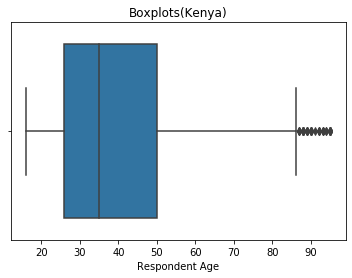

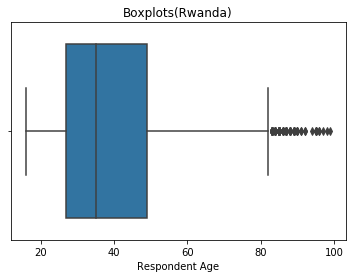

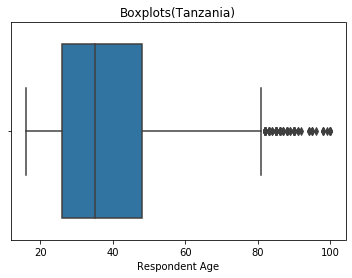

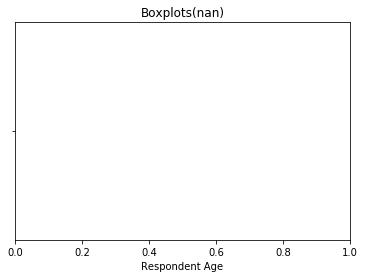

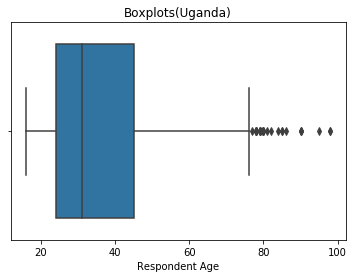

In [20]:
for i in Finance.country.unique():
  plt.figure()
  sns.boxplot(x = Finance[Finance.country==i]['Respondent Age'])
  plt.title(f"Boxplots({i})")
  plt.show()

In [97]:
#Anomalies
Finance.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [105]:
Finance.drop(["country"] ==2029)

KeyError: ignored

Completeness

In [22]:
Finance.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [33]:
#Drop missing 
Finance.dropna()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


Consistency

In [36]:
#Check for duplicates
Finance.duplicated().sum()

0

Uniformity

In [0]:
#Rename the columns
Finance.columns=['country', 'year', 'uniqueid', 'Bank_account', 'Location_type',
       'Cell_Phone_Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'relathip_with_head', 'marital_status',
       'Educuation_level', 'Job_type']


Exploratory Analysis

Univariate Analysis

In [43]:
#Checking the number that has a bank account
Finance.Bank_account.value_counts()

No     20179
Yes     3309
Name: Bank_account, dtype: int64

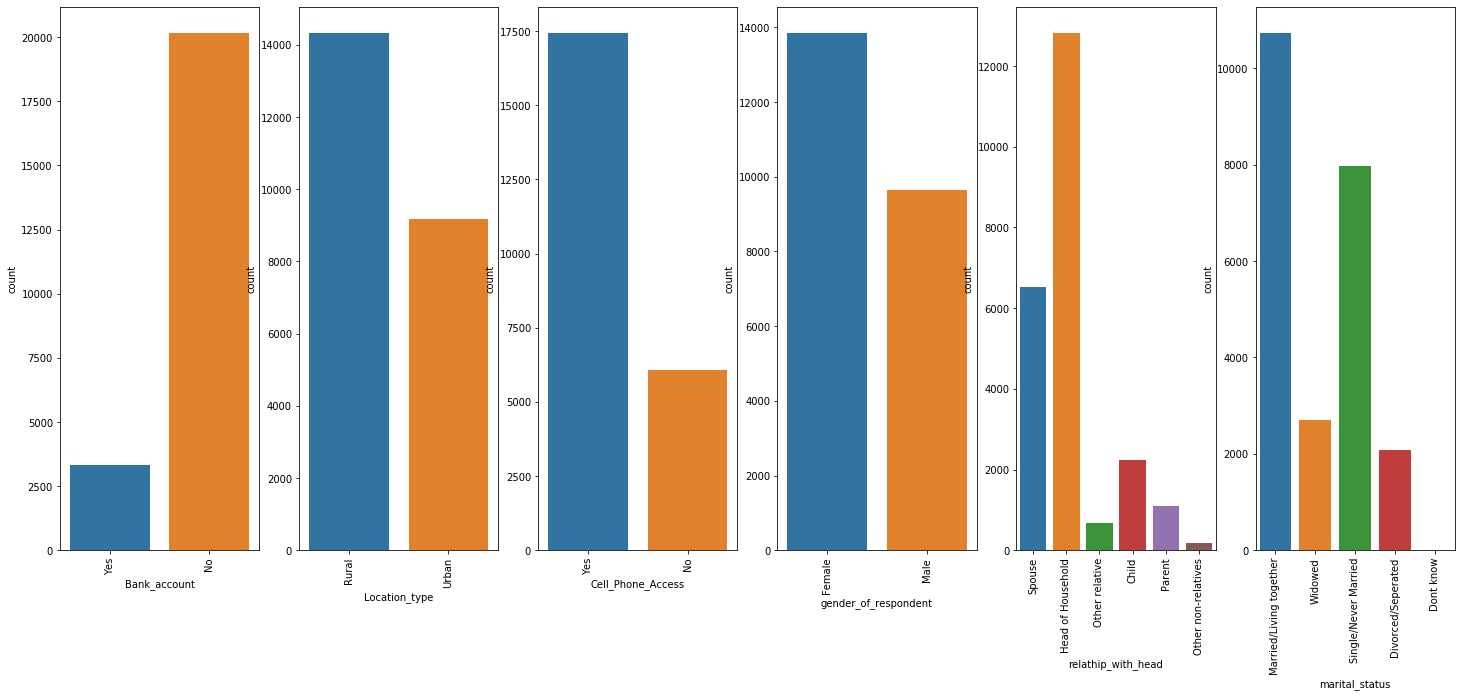

In [92]:
categorical = ['Bank_account', 'Location_type', 'Cell_Phone_Access','gender_of_respondent','relathip_with_head','marital_status']
fig, ax = plt.subplots(1, 6, figsize=(25, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(Finance[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


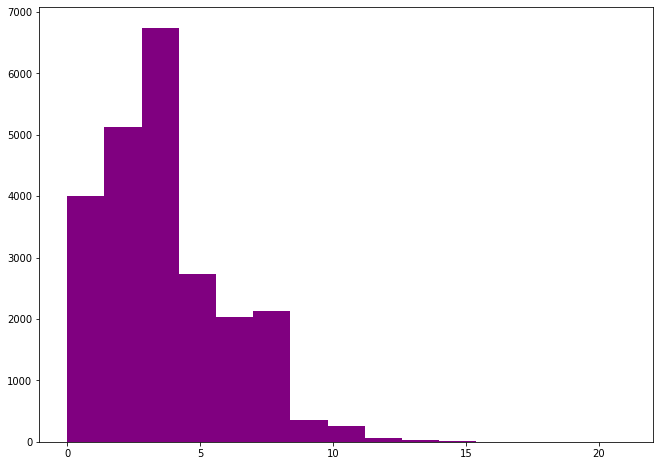

In [72]:
#Numerical analysis
plt.figure(figsize=(11,8))
plt.hist(Finance["'household_size"],bins=15,color="purple")
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


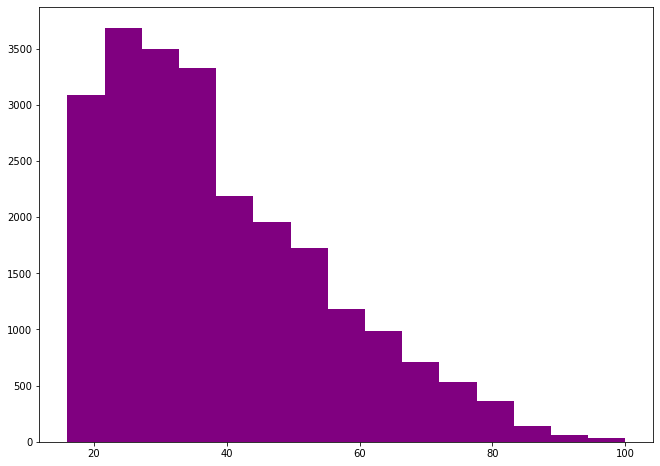

In [73]:
plt.figure(figsize=(11,8))
plt.hist(Finance["Respondent_Age"],bins=15,color="purple")
plt.show()

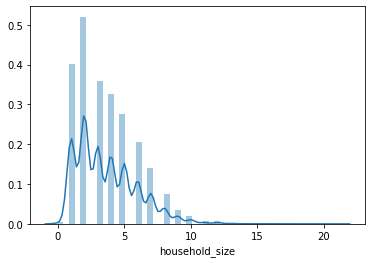

In [74]:
sns.distplot(Finance.household_size.dropna())

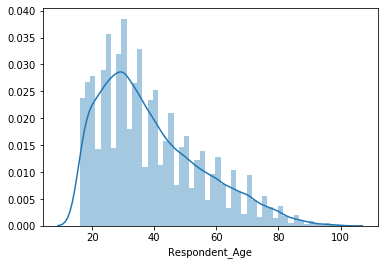

In [75]:
sns.distplot(Finance.Respondent_Age.dropna())

Bivariate Analysis

Numerical and Numerical

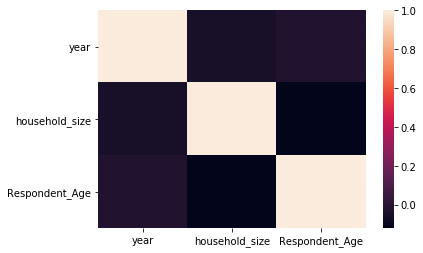

In [84]:
sns.heatmap(Finance.corr())

<function matplotlib.pyplot.show>

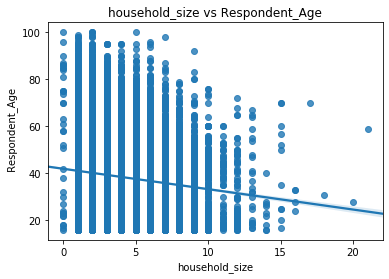

In [81]:
#scatter plot
sns.regplot(x = Finance["household_size"], y = Finance["Respondent_Age"], fit_reg=True)
plt.title("household_size vs Respondent_Age")
plt.xlabel("household_size")
plt.ylabel(" Respondent_Age")
plt.show
#Older respondents have smaller households compared to people in the other age brackets

Numerical and Categorical

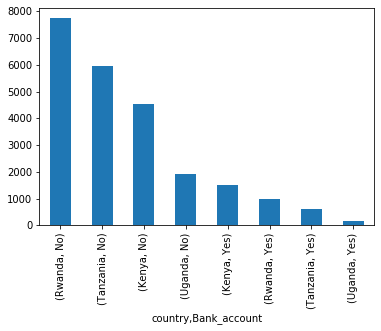

In [114]:
Finance.groupby(["country","Bank_account"])["Bank_account"].count().sort_values(ascending=False).plot.bar()
#Rwanda has the highest number of people with no bank accounts while Kenya has the highest number of people with bank accounts 

Many people could not have bank accounts but have higly rely on the mobile banking that is greatly developing the Africa



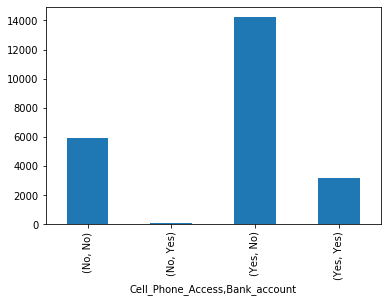

In [117]:
Finance.groupby(['Cell_Phone_Access','Bank_account'])['Bank_account'].count().plot(kind='bar')
#Very few people have the both the cell phones and have a bank account 

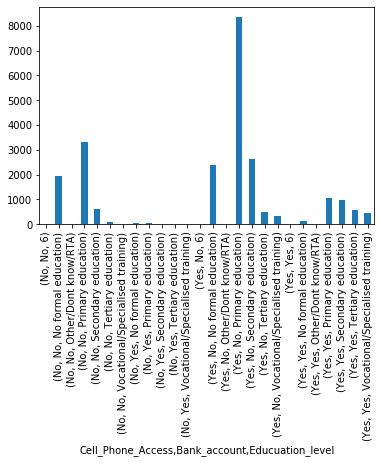

In [118]:
Finance.groupby(['Cell_Phone_Access','Bank_account','Educuation_level'])['Bank_account'].count().plot(kind='bar')

In [116]:
Finance.columns

Index(['country', 'year', 'uniqueid', 'Bank_account', 'Location_type',
       'Cell_Phone_Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'relathip_with_head', 'marital_status',
       'Educuation_level', 'Job_type'],
      dtype='object')

Education levels does not answer if you have a bank account and a cell phone
From our analysis you can clearly see that people who got to the primary level have both cell phones and bank accounts

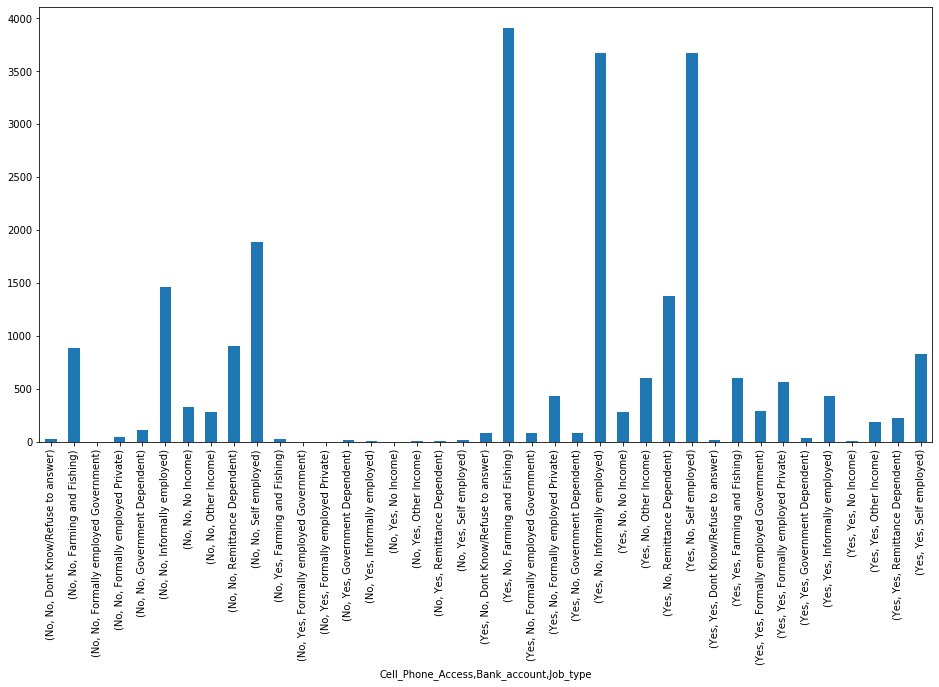

In [125]:
plt.figure(figsize=(16,8))
Finance.groupby(['Cell_Phone_Access','Bank_account','Job_type'])['Bank_account'].count().plot(kind='bar')


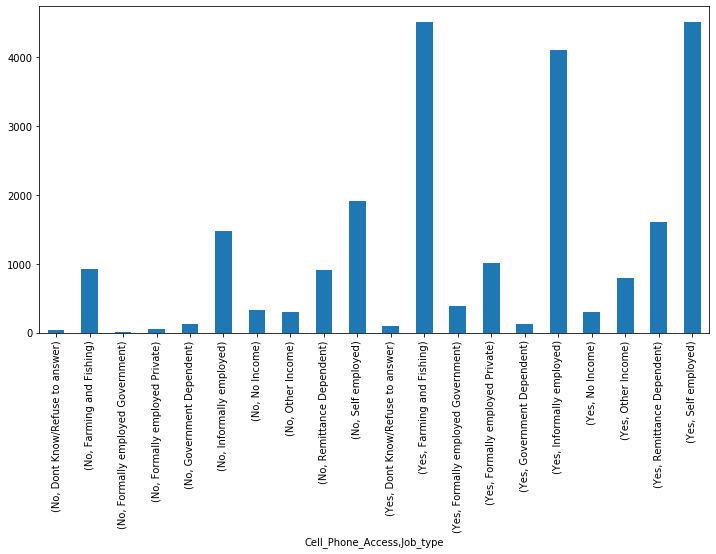

In [129]:
plt.figure(figsize=(12,6))
Finance.groupby(['Cell_Phone_Access','Job_type'])['Job_type'].count().plot(kind='bar')

Many people that have phones are informally employed. This could mean that their financial status is better than the employed persons.

Multivariate Analysis

In [0]:
#Preprocessing
X = Finance.drop('country', 1)
y = Finance['country']

In [0]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [134]:
Finance.dtypes

country                  object
year                      int64
uniqueid                 object
Bank_account             object
Location_type            object
Cell_Phone_Access        object
household_size          float64
Respondent_Age          float64
gender_of_respondent     object
relathip_with_head       object
marital_status           object
Educuation_level         object
Job_type                 object
dtype: object

In [144]:
#int(["household_size ","Respondent_Age "])
Finance['household_size'].astype(np.int64.dropna())

AttributeError: ignored

In [133]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: ignored

Recommendations

Rwanda should bench make on what Kenyans are doing 
The banks should implement mobie banking as many people prefer using phones.That ways they get financial support when need be and they also get to save for the future for more growth 
People that are employed should be talk on the importance of saving hence they shall get to open bank accounts